# Criterion 1: Importing and Analyzing Columns

## Steps Performed

### 1. Reading CSV Files
The CSV files were imported into pandas DataFrames. The data was loaded from the following files:
- **2016_f.csv**
- **2017_f.csv**
- **2018_f.csv**
- **2019_f.csv**
- **2020_f.csv**

Each file contains data from the survey conducted in the respective year.

---

### 2. Column Analysis
To simplify data manipulation and analysis, I reviewed and renamed the columns:
- **Original:** Columns with spaces and uppercase letters.
- **Modified:** Columns with consistent names, using lowercase letters and `_` as a separator.

---

### 3. Adding the Survey Year
A new column named **`survey_year`** was added to each DataFrame. This column indicates the year in which the survey data was collected.

---

### 4. Combining DataFrames
All DataFrames were concatenated into a single final dataset for easier analysis. The consolidated dataset was stored in the **`final_df`** DataFrame, which contains:
- All original columns (with standardized names).
- A new column indicating the survey year.


In [ ]:
import pandas as pd

# Lista de caminhos para os arquivos e seus respectivos anos
file_paths = {
    '/2016_f.csv': 2016,
    '/2017_f.csv': 2017,
    '/2018_f.csv': 2018,
    '/2019_f.csv': 2019,
    '/2020_f.csv': 2020
}

# Lista para armazenar os DataFrames individuais
dataframes = []

# Iterar sobre os arquivos e seus anos
for file_path, year in file_paths.items():
    # Ler o arquivo CSV
    df = pd.read_csv(file_path)

    # Analisar as colunas
    print(f"\nColunas do arquivo {file_path}:")
    print(df.columns)

    # Renomear as colunas para facilitar a codificação
    df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

    # Adicionar uma coluna com o ano da pesquisa
    df['ano_pesquisa'] = year

    # Adicionar o DataFrame à lista
    dataframes.append(df)

# Concatenar os DataFrames
final_df = pd.concat(dataframes, ignore_index=True)

# Verificar as informações do DataFrame final
print("\nInformações do DataFrame final:")
print(final_df.info())



Colunas do arquivo /home/2016_f.csv:
Index(['A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?',
       'A sua empresa ja debateu saude mental formalmente (por exemplo, via um programa de concientizacao corporativo)?',
       'A sua empresa oferece recursos para aprender mais sobre saude mental e alternativas para buscar ajuda?',
       'A sua privacidade eh protegida se voce optar por um tratamento de saude mental oferecido pela sua empresa?',
       'Caso voce sinta a necessidade de solicitar uma licenca do trabalho devido a saude mental, quao facil ou dificil seria fazer essa solicitacao?',
       'Voce se sentiria confortavel discutindo uma questao de saude mental com o seu chefe direto?',
       'Voce se sentiria confortavel discutindo uma questao de saude mental com os seus pares?',
       'O quao propenso voce estaria em dividir com amigos e familiares que voce possui uma doenca mental?',
       'Se voce revelou uma doenca mental par

# Criterion 2: Data Cleaning

## Steps Performed

### 1. Analysis of Missing Values
Missing values in each column were analyzed to determine the amount of missing information. Columns with more than 50% null values were deemed irrelevant and removed from the dataset.

---

### 2. Removal of Columns with High Missing Values
After analysis, columns with a high number of missing values were eliminated. This ensured that the remaining information was sufficient for quality analysis.

---

### 3. Removal of Outliers in the "Age" Column
To ensure data consistency, only ages within the range of 14 to 100 years were retained. Records outside this range were discarded, as they were considered inconsistent or extreme.

---

### 4. Normalization of the "Gender" Column
The **`gender`** column was normalized to include only three main categories:
- **Male**: Responses related to "male," "man," or equivalent terms.
- **Female**: Responses related to "female," "woman," or equivalent terms.
- **Other**: Ambiguous, missing, or uncategorized responses.

This normalization was performed using a combination of conditionals (`if`) and regular expressions (`regex`).

---

### 5. Elimination of Redundant Columns
The **`country_reside`** and **`country_work`** columns were removed, as they provided redundant information and were not essential for the analysis.

---

## Final Result
The data was cleaned and adjusted, ensuring greater consistency and quality for the next stages of the project. The DataFrame is now more compact, free of redundant information, and with standardized categorical columns.


In [ ]:
# 1. Analisar valores faltantes de cada atributo
missing_values = final_df.isnull().sum()
print("Valores faltantes por coluna:\n", missing_values)

# 2. Remover colunas com muitos valores faltantes
# Considerar como muitas faltantes colunas com mais de 50% de valores nulos
threshold = 0.5 * len(final_df)
cols_to_drop = missing_values[missing_values > threshold].index
final_df = final_df.drop(columns=cols_to_drop)

print(f"\nColunas removidas por alta quantidade de valores faltantes: {cols_to_drop}")

# 3. Remover outliers da coluna Idade
# Manter idades no intervalo de 14 a 100
final_df = final_df[(final_df['idade'] >= 14) & (final_df['idade'] <= 100)]

# 4. Normalizar a coluna "gênero" com if e regex
import re

def normalize_gender(gender):
    if pd.isnull(gender):
        return 'Outros'
    gender = str(gender).strip().lower()
    if re.search(r'masc|homem|male|m\b', gender):
        return 'Masculino'
    elif re.search(r'fem|mulher|female|f\b', gender):
        return 'Feminino'
    else:
        return 'Outros'

final_df['genero'] = final_df['genero'].apply(normalize_gender)

# 5. Eliminar colunas redundantes "PaisReside" e "PaisTrabalha"
final_df = final_df.drop(columns=['paisreside', 'paistrabalha'], errors='ignore')

# Verificar o resultado após a limpeza
print("\nInformações do DataFrame após a limpeza:")
print(final_df.info())


Valores faltantes por coluna:
 a_sua_empresa_oferece_beneficios_referentes_a_saude_mental_como_parte_dos_beneficios_de_saude?                                                    424
a_sua_empresa_ja_debateu_saude_mental_formalmente_(por_exemplo,_via_um_programa_de_concientizacao_corporativo)?                                   424
a_sua_empresa_oferece_recursos_para_aprender_mais_sobre_saude_mental_e_alternativas_para_buscar_ajuda?                                            424
a_sua_privacidade_eh_protegida_se_voce_optar_por_um_tratamento_de_saude_mental_oferecido_pela_sua_empresa?                                        424
caso_voce_sinta_a_necessidade_de_solicitar_uma_licenca_do_trabalho_devido_a_saude_mental,_quao_facil_ou_dificil_seria_fazer_essa_solicitacao?     424
voce_se_sentiria_confortavel_discutindo_uma_questao_de_saude_mental_com_o_seu_chefe_direto?                                                       424
voce_se_sentiria_confortavel_discutindo_uma_questao_de_saude_mental_c

# Criterion 3: Answer to Question 1

## Question 1
Is there a significant difference in mental health between employee genders over the time the survey was conducted?

---

## Steps Performed

### 1. Grouping Values
The records of mental illness diagnoses were grouped by **survey year** and **gender**. This grouping allowed for observation of the evolution of mental health among genders over time.

---

### 2. Calculation of Percentage Proportions
The percentage of individuals diagnosed with mental illnesses relative to the total respondents was calculated for each year. This calculation was performed for each gender, enabling proportional comparisons.

---

### 3. Presentation of Results

#### Example of Generated Table:
| Survey Year | Gender     | Count      | Total Respondents | Percentage (%) |
|-------------|------------|------------|-------------------|----------------|
| 2016        | Female     | 214        | 1272             | 16.82          |
| 2016        | Male       | 424        | 1272             | 33.33          |
| 2016        | Other      | 23         | 1272             | 1.81           |
| 2020        | Female     | 12         | 139              | 8.63           |
| 2020        | Male       | 22         | 139              | 15.83          |

#### Graph:
The results were also represented graphically, showing the percentage evolution by gender over the survey years (2016-2020).

---

## Answer Based on the Data
Based on the data, the following observations were made:

- In 2016, the diagnosis percentage for males was **33.33%**, while for females, it was **16.82%**.
- In 2020, both percentages decreased to **15.83%** for males and **8.63%** for females.
- The "Other" category showed lower percentages in all years, peaking in 2018 at **3.00%**.

These differences indicate that mental illness diagnoses were more prevalent among males throughout the analyzed period. Additionally, a general downward trend in percentages was observed from 2016 to 2020.

---

## Conclusion
The data reveals significant differences between genders regarding mental illness diagnoses. These results can be used to develop targeted support policies, considering that the diagnosis percentage for males is consistently higher. The overall reduction in percentages may indicate improved prevention practices or underreporting over the years.


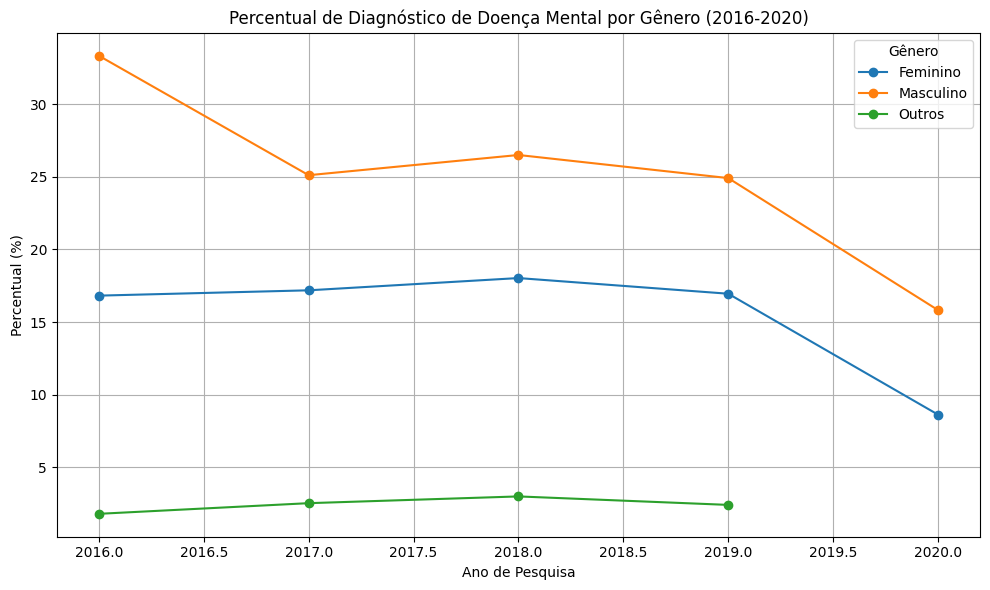


Tabela de Percentual de Diagnóstico de Doença Mental por Ano e Gênero:
    ano_pesquisa     genero  quantidade  total  percentual
0           2016   Feminino         214   1272   16.823899
1           2016  Masculino         424   1272   33.333333
2           2016     Outros          23   1272    1.808176
3           2017   Feminino         115    669   17.189836
4           2017  Masculino         168    669   25.112108
5           2017     Outros          17    669    2.541106
6           2018   Feminino          66    366   18.032787
7           2018  Masculino          97    366   26.502732
8           2018     Outros          11    366    3.005464
9           2019   Feminino          49    289   16.955017
10          2019  Masculino          72    289   24.913495
11          2019     Outros           7    289    2.422145
12          2020   Feminino          12    139    8.633094
13          2020  Masculino          22    139   15.827338


In [ ]:
import matplotlib.pyplot as plt

# 1. Agrupar os valores de pessoas com doença mental por ano de pesquisa e gênero
# Filtrar apenas os registros onde a resposta indica diagnóstico de doença mental
mental_health_by_gender_year = (
    final_df[final_df['voce_ja_foi_diagnosticado_com_uma_doenca_mental?'] == 'Sim']
    .groupby(['ano_pesquisa', 'genero'])
    .size()
    .reset_index(name='quantidade')
)

# 2. Calcular valores percentuais por ano e gênero
total_by_year = final_df.groupby('ano_pesquisa').size().reset_index(name='total')
mental_health_percentage = mental_health_by_gender_year.merge(total_by_year, on='ano_pesquisa')
mental_health_percentage['percentual'] = (
    (mental_health_percentage['quantidade'] / mental_health_percentage['total']) * 100
)

# 3. Apresentar os resultados por meio de gráficos
plt.figure(figsize=(10, 6))
for genero in mental_health_percentage['genero'].unique():
    data = mental_health_percentage[mental_health_percentage['genero'] == genero]
    plt.plot(data['ano_pesquisa'], data['percentual'], marker='o', label=genero)

plt.title('Percentual de Diagnóstico de Doença Mental por Gênero (2016-2020)')
plt.xlabel('Ano de Pesquisa')
plt.ylabel('Percentual (%)')
plt.legend(title='Gênero')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Exibir os dados em tabela
print("\nTabela de Percentual de Diagnóstico de Doença Mental por Ano e Gênero:")
print(mental_health_percentage)

# Opcional: Salvar a tabela como CSV para análise posterior
mental_health_percentage.to_csv('mental_health_percentage.csv', index=False)


# Criterion 4: Answer to Question 2

## Question 2
Is there a significant difference in treatment-seeking behavior among employee genders over the time the survey was conducted?

---

## Steps Performed

### 1. Grouping Values
The records of individuals seeking treatment for mental illnesses were grouped by **survey year** and **gender**. This grouping allowed for observation of the evolution of treatment-seeking behavior among genders over time.

---

### 2. Calculation of Percentage Proportions
The percentage of individuals seeking treatment relative to the total respondents was calculated for each year. This calculation was performed for each gender, enabling proportional comparisons.

---

## Answer Based on the Data
Based on the data, the following observations were made:

- In 2016, the percentage of males seeking treatment was **38.99%**, while for females, it was **19.58%**.
- In 2020, both percentages decreased to **31.65%** for males and **13.67%** for females.
- The "Other" category consistently showed low percentages, with the highest rates observed in 2017 and 2018, reaching **3.83%**.

These data indicate that males sought treatment more frequently throughout the analyzed period. Additionally, the overall reduction in percentages may suggest preventive improvements or underreporting.

---

## Conclusion
The data reveals significant differences between genders in seeking treatment for mental illnesses. These results can be used to develop policies encouraging treatment, particularly for groups with lower percentages, such as females and the "Other" category. The downward trend over time could serve as a basis for investigating access to treatment or changes in employee behavior.


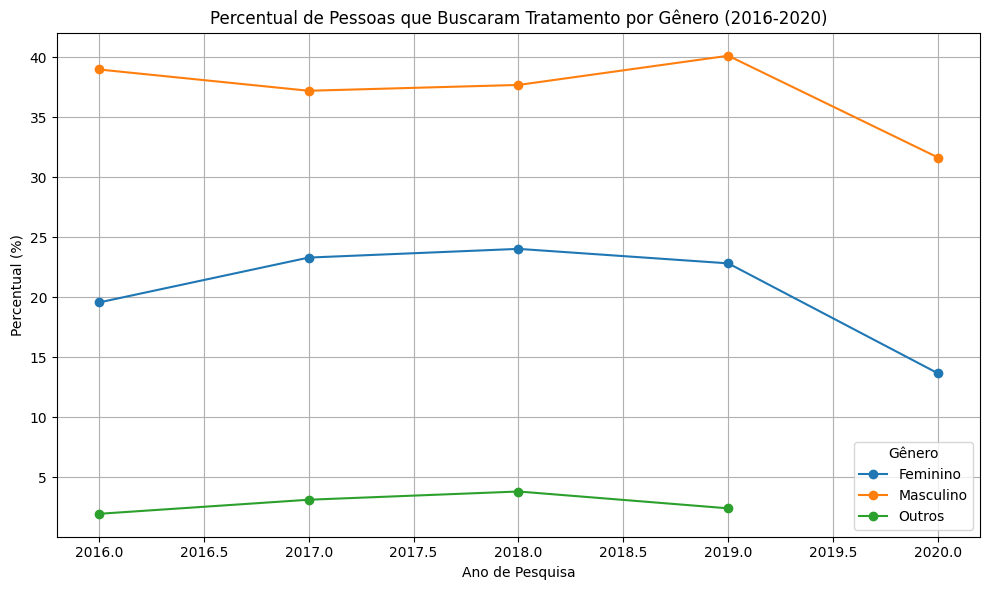


Tabela de Percentual de Pessoas que Buscaram Tratamento por Ano e Gênero:
    ano_pesquisa     genero  quantidade  total  percentual
0           2016   Feminino         249   1272   19.575472
1           2016  Masculino         496   1272   38.993711
2           2016     Outros          25   1272    1.965409
3           2017   Feminino         156    669   23.318386
4           2017  Masculino         249    669   37.219731
5           2017     Outros          21    669    3.139013
6           2018   Feminino          88    366   24.043716
7           2018  Masculino         138    366   37.704918
8           2018     Outros          14    366    3.825137
9           2019   Feminino          66    289   22.837370
10          2019  Masculino         116    289   40.138408
11          2019     Outros           7    289    2.422145
12          2020   Feminino          19    139   13.669065
13          2020  Masculino          44    139   31.654676


In [ ]:
# 1. Agrupar os valores de pessoas que buscam tratamento por ano de pesquisa e gênero
treatment_by_gender_year = (
    final_df[final_df['voce_ja_procurou_tratamento_profissional_para_uma_doenca_mental?'] == 'Sim']
    .groupby(['ano_pesquisa', 'genero'])
    .size()
    .reset_index(name='quantidade')
)

# 2. Calcular valores percentuais por ano e gênero
total_by_year = final_df.groupby('ano_pesquisa').size().reset_index(name='total')
treatment_percentage = treatment_by_gender_year.merge(total_by_year, on='ano_pesquisa')
treatment_percentage['percentual'] = (
    (treatment_percentage['quantidade'] / treatment_percentage['total']) * 100
)

# 3. Apresentar os resultados por meio de gráficos
plt.figure(figsize=(10, 6))
for genero in treatment_percentage['genero'].unique():
    data = treatment_percentage[treatment_percentage['genero'] == genero]
    plt.plot(data['ano_pesquisa'], data['percentual'], marker='o', label=genero)

plt.title('Percentual de Pessoas que Buscaram Tratamento por Gênero (2016-2020)')
plt.xlabel('Ano de Pesquisa')
plt.ylabel('Percentual (%)')
plt.legend(title='Gênero')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Exibir os dados em tabela
print("\nTabela de Percentual de Pessoas que Buscaram Tratamento por Ano e Gênero:")
print(treatment_percentage)



# Criterion 5: Answer to Question 3

## Question 3
Is there a significant difference in mental health among employee age groups over the time the survey was conducted?

---

## Steps Performed

### 1. Discretization of Ages
Ages were grouped into three main categories:
- **Youth**: From 14 to 24 years old.
- **Adults**: From 25 to 64 years old.
- **Seniors**: From 65 to 100 years old.

This categorization allowed for clearer observation of differences among age groups.

---

### 2. Grouping Values
The records of mental illness diagnoses were grouped by **survey year** and **age group**. This grouping facilitated analysis of how diagnoses varied among age groups over the years.

---

### 3. Calculation of Percentage Proportions
The percentage of individuals diagnosed relative to the total respondents was calculated for each year within each age group. This calculation revealed significant proportional differences.

---

### 4. Presentation of Results

#### Key Findings from the Table:
- In **2016**, the **Adult** group had the highest diagnosis percentage at **47.48%**, followed by **Youth** at **4.17%**.
- In **2020**, the percentage decreased significantly for all groups, with **23.02%** for **Adults** and **1.44%** for **Youth**. The **Senior** group recorded no diagnoses in 2018, 2019, and 2020.

#### Graph:
The generated graph shows the percentage evolution of mental illness diagnoses by age group over time (2016-2020), highlighting trends for each age range.

---

## Answer Based on the Data
Based on the data, the following observations were made:

- The **Adult** group consistently had the highest percentages of diagnoses in all analyzed years, notably in 2016 (**47.48%**) with a significant drop in 2020 (**23.02%**).
- The **Youth** group exhibited much lower percentages, peaking in 2019 (**4.50%**) and decreasing to **1.44%** in 2020.
- The **Senior** group showed insignificant or zero percentages in most years.

These results suggest that the prevalence of mental illness diagnoses is more common among **Adults**, while **Youth** and **Seniors** are significantly less represented.

---

## Conclusion
The data reveals significant differences among age groups in mental illness diagnoses. The **Adult** group deserves special attention due to its higher percentage of diagnoses, while the **Youth** and **Senior** groups may be underrepresented or less likely to report diagnoses. These findings can inform policies targeting specific age groups within companies.


<ipython-input-9-b0d77d61de93>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['ano_pesquisa', 'grupo_idade'])


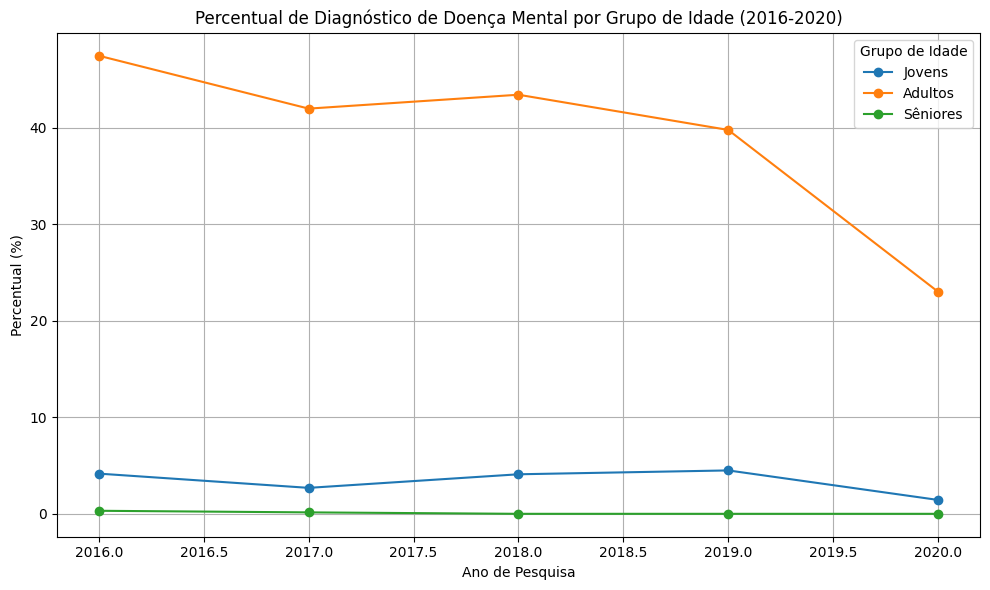


Tabela de Percentual de Diagnóstico de Doença Mental por Ano e Grupo de Idade:
    ano_pesquisa grupo_idade  quantidade  total  percentual
0           2016      Jovens          53   1272    4.166667
1           2016     Adultos         604   1272   47.484277
2           2016    Sêniores           4   1272    0.314465
3           2017      Jovens          18    669    2.690583
4           2017     Adultos         281    669   42.002990
5           2017    Sêniores           1    669    0.149477
6           2018      Jovens          15    366    4.098361
7           2018     Adultos         159    366   43.442623
8           2018    Sêniores           0    366    0.000000
9           2019      Jovens          13    289    4.498270
10          2019     Adultos         115    289   39.792388
11          2019    Sêniores           0    289    0.000000
12          2020      Jovens           2    139    1.438849
13          2020     Adultos          32    139   23.021583
14          2020    

In [ ]:
# 1. Criar intervalos para discretizar as idades
bins = [14, 24, 64, 100]  # Intervalos de idade
labels = ['Jovens', 'Adultos', 'Sêniores']  # Rótulos para as faixas etárias
final_df['grupo_idade'] = pd.cut(final_df['idade'], bins=bins, labels=labels)

# 2. Agrupar os valores de pessoas com doença mental por ano de pesquisa e grupo de idade
mental_health_by_age_group_year = (
    final_df[final_df['voce_ja_foi_diagnosticado_com_uma_doenca_mental?'] == 'Sim']
    .groupby(['ano_pesquisa', 'grupo_idade'])
    .size()
    .reset_index(name='quantidade')
)

# 3. Calcular valores percentuais por ano e grupo de idade
total_by_year = final_df.groupby('ano_pesquisa').size().reset_index(name='total')
mental_health_age_percentage = mental_health_by_age_group_year.merge(total_by_year, on='ano_pesquisa')
mental_health_age_percentage['percentual'] = (
    (mental_health_age_percentage['quantidade'] / mental_health_age_percentage['total']) * 100
)

# 4. Apresentar os resultados por meio de gráficos
plt.figure(figsize=(10, 6))
for grupo in mental_health_age_percentage['grupo_idade'].unique():
    data = mental_health_age_percentage[mental_health_age_percentage['grupo_idade'] == grupo]
    plt.plot(data['ano_pesquisa'], data['percentual'], marker='o', label=grupo)

plt.title('Percentual de Diagnóstico de Doença Mental por Grupo de Idade (2016-2020)')
plt.xlabel('Ano de Pesquisa')
plt.ylabel('Percentual (%)')
plt.legend(title='Grupo de Idade')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Exibir os dados em tabela
print("\nTabela de Percentual de Diagnóstico de Doença Mental por Ano e Grupo de Idade:")
print(mental_health_age_percentage)



# Criterion 6: Answer to Question 4

## Question 4
Is there a significant difference in treatment-seeking behavior among employee age groups over the time the survey was conducted?

---

## Steps Performed

### 1. Discretization of Ages
Ages were grouped into three main categories:
- **Youth**: From 14 to 24 years old.
- **Adults**: From 25 to 64 years old.
- **Seniors**: From 65 to 100 years old.

This categorization allowed for clearer observation of differences among age groups.

---

### 2. Grouping Values
The records of individuals seeking treatment for mental illnesses were grouped by **survey year** and **age group**. This grouping facilitated analysis of how treatment-seeking behavior varied among age groups over the years.

---

### 3. Calculation of Percentage Proportions
The percentage of individuals seeking treatment relative to the total respondents was calculated for each year within each age group. This calculation revealed significant proportional differences.

---

### 4. Presentation of Results

#### Key Findings from the Table:
- In **2016**, the **Adult** group had the highest percentage of treatment-seeking behavior at **55.35%**, followed by **Youth** at **4.80%**.
- In **2020**, the percentage decreased significantly for all groups, with **41.01%** for **Adults** and **4.32%** for **Youth**. The **Senior** group recorded no treatment-seeking behavior in 2019 and 2020.
- The **Youth** group consistently showed low percentages across all years, peaking in 2019 (**5.54%**).

#### Graph:
The generated graph shows the percentage evolution of treatment-seeking behavior among age groups over time (2016-2020), highlighting the dominance of the **Adult** group.

---

## Answer Based on the Data
Based on the data, the following observations were made:

- The **Adult** group consistently had the highest percentages of treatment-seeking behavior across all analyzed years, notably in 2016 (**55.35%**) with a significant decrease in 2020 (**41.01%**).
- The **Youth** group exhibited much lower percentages compared to adults, but with a slight upward trend in 2019 (**5.54%**).
- The **Senior** group had almost nonexistent treatment-seeking behavior over the years, with residual values only in 2016, 2017, and 2018.

These results suggest that treatment-seeking behavior is most prevalent among **Adults**, while **Youth** and **Seniors** face challenges or barriers to seeking treatment.

---

## Conclusion
The data reveals significant differences among age groups in treatment-seeking behavior for mental illnesses. The **Adult** group is the most likely to seek treatment, while **Youth** and **Seniors** may be underrepresented or face barriers to accessing treatment. These findings can inform more inclusive policies and practices aimed at these less represented groups.


<ipython-input-10-1bade3855c5d>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['ano_pesquisa', 'grupo_idade'])


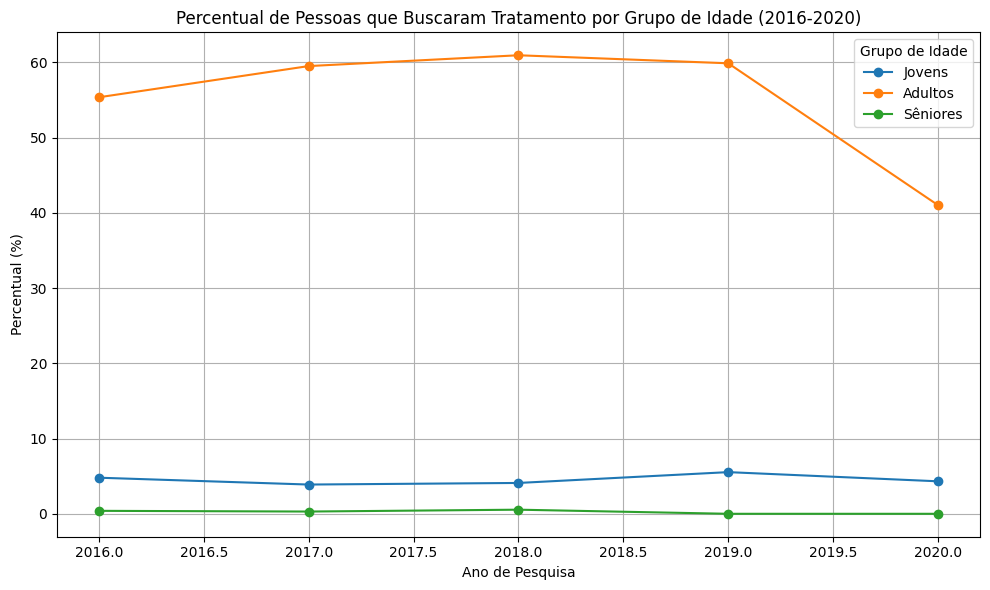


Tabela de Percentual de Pessoas que Buscaram Tratamento por Ano e Grupo de Idade:
    ano_pesquisa grupo_idade  quantidade  total  percentual
0           2016      Jovens          61   1272    4.795597
1           2016     Adultos         704   1272   55.345912
2           2016    Sêniores           5   1272    0.393082
3           2017      Jovens          26    669    3.886398
4           2017     Adultos         398    669   59.491779
5           2017    Sêniores           2    669    0.298954
6           2018      Jovens          15    366    4.098361
7           2018     Adultos         223    366   60.928962
8           2018    Sêniores           2    366    0.546448
9           2019      Jovens          16    289    5.536332
10          2019     Adultos         173    289   59.861592
11          2019    Sêniores           0    289    0.000000
12          2020      Jovens           6    139    4.316547
13          2020     Adultos          57    139   41.007194
14          2020 

In [ ]:
# 1. Criar intervalos para discretizar as idades
bins = [14, 24, 64, 100]  # Intervalos de idade
labels = ['Jovens', 'Adultos', 'Sêniores']  # Rótulos para as faixas etárias
final_df['grupo_idade'] = pd.cut(final_df['idade'], bins=bins, labels=labels)

# 2. Agrupar os valores de pessoas que buscaram tratamento por ano de pesquisa e grupo de idade
treatment_by_age_group_year = (
    final_df[final_df['voce_ja_procurou_tratamento_profissional_para_uma_doenca_mental?'] == 'Sim']
    .groupby(['ano_pesquisa', 'grupo_idade'])
    .size()
    .reset_index(name='quantidade')
)

# 3. Calcular valores percentuais por ano e grupo de idade
total_by_year = final_df.groupby('ano_pesquisa').size().reset_index(name='total')
treatment_age_percentage = treatment_by_age_group_year.merge(total_by_year, on='ano_pesquisa')
treatment_age_percentage['percentual'] = (
    (treatment_age_percentage['quantidade'] / treatment_age_percentage['total']) * 100
)

# 4. Apresentar os resultados por meio de gráficos
plt.figure(figsize=(10, 6))
for grupo in treatment_age_percentage['grupo_idade'].unique():
    data = treatment_age_percentage[treatment_age_percentage['grupo_idade'] == grupo]
    plt.plot(data['ano_pesquisa'], data['percentual'], marker='o', label=grupo)

plt.title('Percentual de Pessoas que Buscaram Tratamento por Grupo de Idade (2016-2020)')
plt.xlabel('Ano de Pesquisa')
plt.ylabel('Percentual (%)')
plt.legend(title='Grupo de Idade')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Exibir os dados em tabela
print("\nTabela de Percentual de Pessoas que Buscaram Tratamento por Ano e Grupo de Idade:")
print(treatment_age_percentage)


# Criterion 7: Answer to Question 5

## Question 5
Do employees of companies that offer health benefits for mental health treatment seek treatment more frequently?

---

## Steps Performed

### 1. Grouping Values
The records of individuals seeking treatment for mental illnesses were grouped by the type of benefit offered by the company. This categorization allowed for observation of whether the presence of mental health-related benefits impacts treatment-seeking behavior.

---

### 2. Calculation of Percentage Proportions
The percentage of individuals seeking treatment relative to the total respondents was calculated for each type of benefit. This calculation revealed significant differences among the groups.

---

### 3. Presentation of Results

#### Key Findings from the Table:
- Employees of companies that **offer mental health-related benefits** had the highest percentage of treatment-seeking behavior (**69.86%**).
- Employees who **do not know** whether their company offers benefits had a lower percentage (**46.71%**).
- Employees from companies where the benefit is **not eligible** also showed high percentages, notably in cases classified as "Not eligible - NA" (**68.52%**).

#### Graph:
The generated graph shows the percentages of treatment-seeking behavior for each type of benefit offered, highlighting the significant differences among the groups.

---

## Answer Based on the Data
Based on the data, the following observations were made:

- Employees of companies offering mental health-related benefits seek treatment more frequently (**69.86%**).
- Even among employees in companies where the benefit is not eligible, the percentages remain high, suggesting that other factors might influence the decision to seek treatment.
- Employees unaware of their company's benefits had the lowest percentages of treatment-seeking behavior, indicating a potential lack of awareness about available resources.

These findings suggest that the presence of mental health benefits in companies is positively correlated with treatment-seeking behavior, but there is room to improve communication about these benefits to employees.

---

## Conclusion
The data suggests that companies offering mental health-related benefits encourage employees to seek treatment, but awareness of these benefits is crucial to achieving greater impact. Policies focused on promoting and informing employees about these resources can enhance access to and utilization of mental health services.


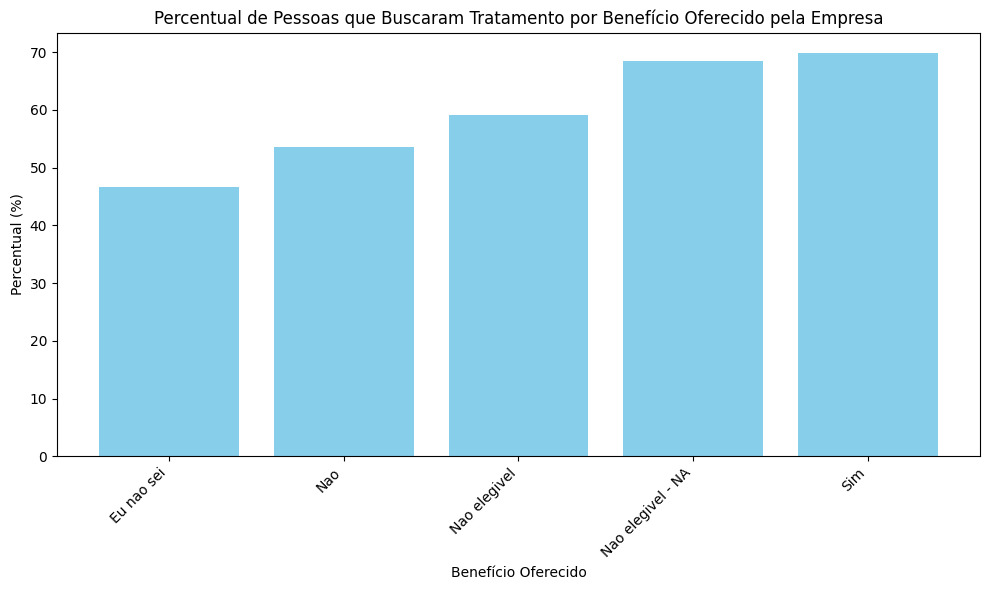


Tabela de Percentual de Pessoas que Buscaram Tratamento por Tipo de Benefício Oferecido:
  a_sua_empresa_oferece_beneficios_referentes_a_saude_mental_como_parte_dos_beneficios_de_saude?  \
0                                         Eu nao sei                                               
1                                                Nao                                               
2                                       Nao elegivel                                               
3                                  Nao elegivel - NA                                               
4                                                Sim                                               

   quantidade  total  percentual  
0         291    623   46.709470  
1         158    295   53.559322  
2          39     66   59.090909  
3          37     54   68.518519  
4         890   1274   69.858713  


In [ ]:
import matplotlib.pyplot as plt

# 1. Agrupar os valores de pessoas que buscaram tratamento por tipo de benefício oferecido pela empresa
treatment_by_benefit = (
    final_df[final_df['voce_ja_procurou_tratamento_profissional_para_uma_doenca_mental?'] == 'Sim']
    .groupby(['a_sua_empresa_oferece_beneficios_referentes_a_saude_mental_como_parte_dos_beneficios_de_saude?'])
    .size()
    .reset_index(name='quantidade')
)

# Calcular o total de respondentes por benefício oferecido
total_by_benefit = final_df.groupby('a_sua_empresa_oferece_beneficios_referentes_a_saude_mental_como_parte_dos_beneficios_de_saude?').size().reset_index(name='total')

# 2. Calcular valores percentuais
treatment_benefit_percentage = treatment_by_benefit.merge(total_by_benefit, on='a_sua_empresa_oferece_beneficios_referentes_a_saude_mental_como_parte_dos_beneficios_de_saude?')
treatment_benefit_percentage['percentual'] = (
    (treatment_benefit_percentage['quantidade'] / treatment_benefit_percentage['total']) * 100
)

# 3. Apresentar os resultados por meio de gráficos
plt.figure(figsize=(10, 6))
plt.bar(
    treatment_benefit_percentage['a_sua_empresa_oferece_beneficios_referentes_a_saude_mental_como_parte_dos_beneficios_de_saude?'],
    treatment_benefit_percentage['percentual'],
    color='skyblue'
)
plt.title('Percentual de Pessoas que Buscaram Tratamento por Benefício Oferecido pela Empresa')
plt.xlabel('Benefício Oferecido')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Exibir os dados em tabela
print("\nTabela de Percentual de Pessoas que Buscaram Tratamento por Tipo de Benefício Oferecido:")
print(treatment_benefit_percentage)

# Opcional: Salvar a tabela como CSV
#treatment_benefit_percentage.to_csv('treatment_benefit_percentage.csv', index=False)


# Criterion 8: Answer to Question 6

## Question 6
Is there a significant difference in mental health among richer countries (with high GDP) in 2016?

---

## Steps Performed

### 1. Importing GDP Data
GDP data from Phase 1 was imported, and values corresponding to the year 2016 were selected. The column for country names was renamed to align with the primary DataFrame, allowing for table merging based on the country name.

---

### 2. Adding GDP Information
The GDP of each country was associated with the responses in the primary DataFrame based on the country name. This step enabled a cross-analysis between mental illness diagnoses and the wealth of countries.

---

### 3. Grouping Values
Records of mental illness diagnoses were grouped by **country** and **GDP** for the year 2016. For each country, the percentage of diagnoses relative to the total respondents was calculated.

---

### 4. Presentation of Results

#### Key Findings from the Table:
| Country           | GDP                  | Diagnosis Percentage (%) |
|-------------------|----------------------|--------------------------|
| United States     | 18,695,110,842,000  | 56.38                   |
| Germany           | 3,469,853,463,946   | 36.21                   |
| United Kingdom    | 2,699,659,680,997   | 42.22                   |
| Australia         | 1,206,535,157,956   | 68.57                   |
| Netherlands       | 784,060,430,240     | 52.08                   |

#### Graph:
The generated graph illustrates the relationship between **GDP** and the **percentage of mental illness diagnoses** by country in 2016. It is evident that, while there appears to be a correlation, it is not uniform, with significant variations between countries.

---

## Answer Based on the Data
Based on the data, the following observations were made:

- Countries with high percentages of mental illness diagnoses, such as the **United States** (**56.38%**) and **Australia** (**68.57%**), show no clear correlation when compared to GDP.
- Countries with moderately high GDPs, such as **Germany** (**36.21%**) and **Canada** (**38.96%**), have lower percentages.
- The diagnosis percentage does not follow a uniform trend with GDP, indicating that factors beyond economic wealth may influence the results.

---

## Conclusion
The data suggests that, while richer countries show high percentages of mental illness diagnoses, the relationship is not entirely linear. Cultural factors, access to mental health care, and awareness of the topic may play significant roles in the variations observed among countries. These findings can guide further studies on the social and economic determinants of mental health.


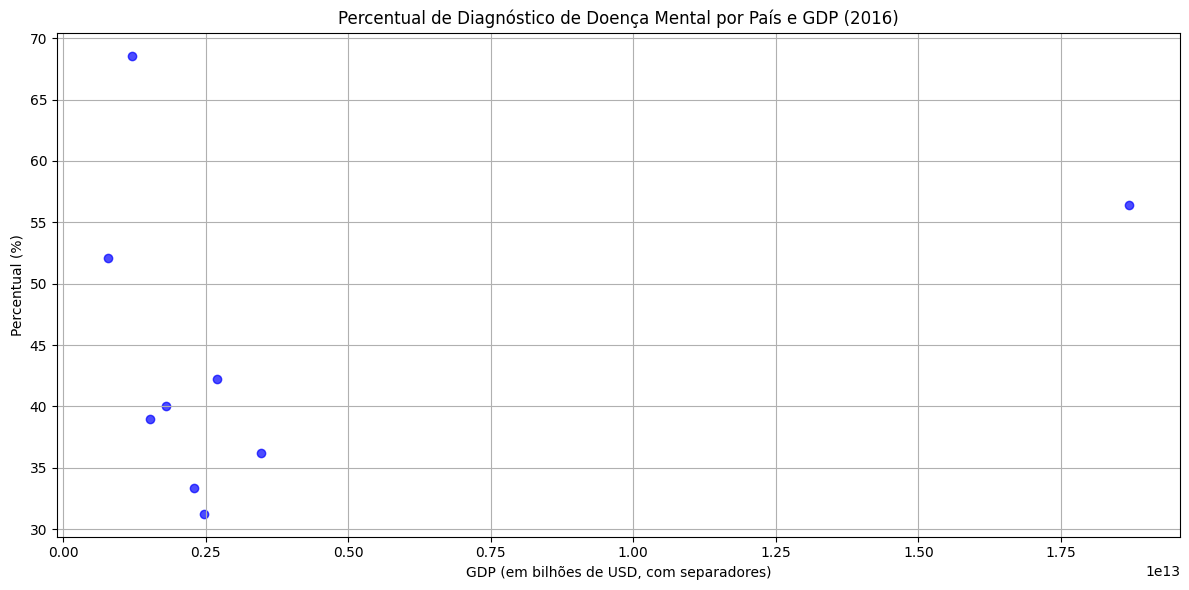


Tabela de Percentual de Diagnóstico de Doença Mental por País e GDP (2016):
  qual_pais_voce_reside?                 GDP  quantidade  total  percentual
8          United States  18,695,110,842,000         473    839   56.376639
4                Germany   3,469,853,463,946          21     58   36.206897
7         United Kingdom   2,699,659,680,997          76    180   42.222222
3                 France   2,472,964,344,587           5     16   31.250000
5                  India   2,294,797,980,509           3      9   33.333333
1                 Brazil   1,795,700,168,991           4     10   40.000000
2                 Canada   1,527,994,741,907          30     77   38.961039
0              Australia   1,206,535,157,956          24     35   68.571429
6            Netherlands     784,060,430,240          25     48   52.083333


In [ ]:
import matplotlib.pyplot as plt

# 1. Importar os dados de GDP e renomear a coluna do país
gdp_data = pd.read_csv('/home/gdp_data.csv')
gdp_data.rename(columns={'nome': 'qual_pais_voce_reside?'}, inplace=True)

# Selecionar apenas os dados de GDP de 2016
gdp_2016 = gdp_data[['qual_pais_voce_reside?', '2016']].rename(columns={'2016': 'GDP'})

# 2. Adicionar a informação de GDP no DataFrame principal
# Fazer o mapeamento do nome do país para o GDP
final_df['GDP'] = final_df['qual_pais_voce_reside?'].map(
    gdp_2016.set_index('qual_pais_voce_reside?')['GDP']
)

# Remover qualquer separador de milhares existente e converter o GDP para float
final_df['GDP'] = final_df['GDP'].apply(lambda x: float(str(x).replace(',', '')) if not pd.isnull(x) else None)

# 3. Agrupar os valores de pessoas com doença mental no ano de 2016 por GDP e país
mental_health_gdp_2016 = (
    final_df[(final_df['ano_pesquisa'] == 2016) & (final_df['voce_ja_foi_diagnosticado_com_uma_doenca_mental?'] == 'Sim')]
    .groupby(['qual_pais_voce_reside?', 'GDP'])
    .size()
    .reset_index(name='quantidade')
)

# Adicionar o total de respondentes por país
total_by_country = final_df[final_df['ano_pesquisa'] == 2016].groupby('qual_pais_voce_reside?').size().reset_index(name='total')

# Combinar os dados para calcular os percentuais
mental_health_gdp_2016 = mental_health_gdp_2016.merge(total_by_country, on='qual_pais_voce_reside?')
mental_health_gdp_2016['percentual'] = (
    (mental_health_gdp_2016['quantidade'] / mental_health_gdp_2016['total']) * 100
)

# 4. Trabalhar com os valores de forma percentual proporcional a cada agrupamento
# Ordenar os dados por GDP para facilitar a análise
mental_health_gdp_2016 = mental_health_gdp_2016.sort_values(by='GDP', ascending=False)

# Formatar o GDP com separadores para exibição
mental_health_gdp_2016['GDP'] = mental_health_gdp_2016['GDP'].apply(lambda x: f"{x:,.0f}" if not pd.isnull(x) else None)

# 5. Apresentar os resultados por meio de gráficos
plt.figure(figsize=(12, 6))
plt.scatter(
    [float(str(x).replace(',', '')) for x in mental_health_gdp_2016['GDP']],
    mental_health_gdp_2016['percentual'],
    c='blue',
    alpha=0.7
)
plt.title('Percentual de Diagnóstico de Doença Mental por País e GDP (2016)')
plt.xlabel('GDP (em bilhões de USD, com separadores)')
plt.ylabel('Percentual (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Exibir os dados em tabela
print("\nTabela de Percentual de Diagnóstico de Doença Mental por País e GDP (2016):")
print(mental_health_gdp_2016)

# Opcional: Salvar os dados em CSV
mental_health_gdp_2016.to_csv('mental_health_gdp_2016.csv', index=False)
